# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# Run some setup code
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# bool var. to let program show debug info.
debug = True
show_img = True

We will use the class TwoLayerNet in the file nnet.py to represent instances of our network. The network parameters are stored in the instance variable self.params where keys are string parameter names and values are numpy arrays. 

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

Cifar-10 dataset has been loaded
X shape (50000, 32, 32, 3)
y shape (50000,)
X_test shape (10000, 32, 32, 3)
y_test shape (10000,)
Data has been splited.
X shape (49000, 32, 32, 3)
y shape (49000,)
X_val shape (1000, 32, 32, 3)
y_val shape (1000,)
X_test shape (1000, 32, 32, 3)
y_test shape (1000,)
X_dev shape (500, 32, 32, 3)
y_dev shape (500,)
Data has been reshaped.
X shape (49000, 3072)
X_val shape (1000, 3072)
X_test shape (1000, 3072)
X_dev shape (500, 3072)


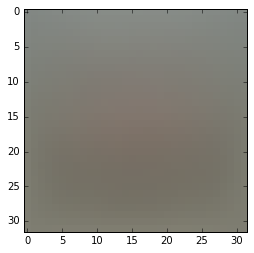

In [2]:
import cifar10
# Load the raw CIFAR-10 data
X, y, X_test, y_test = cifar10.load('../cifar-10-batches-py', debug = debug)

m = 49000
m_val = 1000
m_test = 1000
m_dev = 500

X, y, X_test, y_test, X_dev, y_dev, X_val, y_val = cifar10.split_vec(X, y, X_test, y_test, m, m_test, m_val, m_dev, debug = debug, show_img = show_img)

In [34]:
from nnet import NNet
n0 = X_dev.shape[1]
n1 = 20
n2 = 10
# Forward pass: compute scores
model = NNet(n0, n1, n2)
model.train_check(X_dev, y_dev, lamda = 3.3)

J = 2.30359275972 sanity check = 2.30258509299

 grad. check on W 1
rel. err. 1.70345805139e-07 numerical: 6.21255269451e-05 analytical: 6.21255481107e-05
rel. err. 4.15464861785e-08 numerical: -0.0005274644721 analytical: -0.000527464428271
rel. err. 1.43564609245e-08 numerical: -0.000338431949132 analytical: -0.000338431958849
rel. err. 1.52219846271e-08 numerical: 0.000227232699324 analytical: 0.000227232692406
rel. err. 1.08661324306e-07 numerical: -3.36479732965e-05 analytical: -3.3647980609e-05
rel. err. 0.00234482176108 numerical: 0.000696697810554 analytical: 0.00069343818941
rel. err. 0.000804370654732 numerical: 0.000291463764235 analytical: 0.000291933031497
rel. err. 1.10787010848e-08 numerical: 0.0012107447489 analytical: 0.00121074477573
rel. err. 0.0053476814933 numerical: -0.000140109612801 analytical: -0.000141616192677
rel. err. 1.30326150624e-09 numerical: -0.000342493988725 analytical: -0.000342493987833

 grad. check on b 1
rel. err. 7.84857135135e-07 numerical: 3.

# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

iteration 0 / 1000: loss 1.826109
iteration 245 / 1000: loss 1.960263
iteration 490 / 1000: loss 1.710266
iteration 735 / 1000: loss 1.773176
iteration 980 / 1000: loss 1.753606


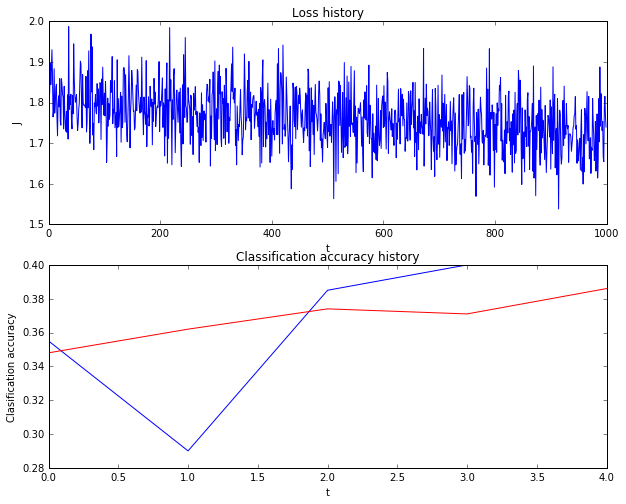

val. acc.: 0.391


In [27]:
n0 = X_dev.shape[1]
n1 = 20
n2 = 10

alpha, lamda, T, B, rho = 1e-4, 0.5, 1000, 200, 0.95
hpara = (alpha, lamda, T, B, rho)

# Forward pass: compute scores
model = NNet(n0, n1, n2)
model.train(X, y, X_val, y_val, hpara, debug, show_img)

# Predict on the val. set
print 'val. acc.:', np.mean(model.predict(X_val) == y_val)

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

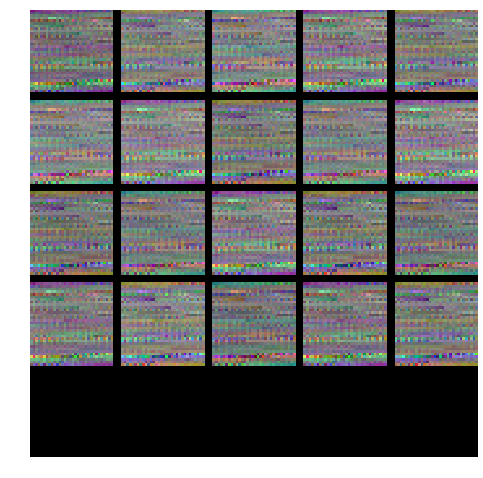

In [33]:
model.visualize_W()

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

(0.002, 0.03, 10000, 200, 0.95)
iteration 0 / 10000: loss 2.302652
iteration 245 / 10000: loss 1.717967
iteration 490 / 10000: loss 1.606735
iteration 735 / 10000: loss 1.356893
iteration 980 / 10000: loss 1.384433
iteration 1225 / 10000: loss 1.431550
iteration 1470 / 10000: loss 1.307077
iteration 1715 / 10000: loss 1.440933
iteration 1960 / 10000: loss 1.177120
iteration 2205 / 10000: loss 1.049871
iteration 2450 / 10000: loss 1.206743
iteration 2695 / 10000: loss 1.112783
iteration 2940 / 10000: loss 1.081869
iteration 3185 / 10000: loss 1.075423
iteration 3430 / 10000: loss 1.046295
iteration 3675 / 10000: loss 1.024822
iteration 3920 / 10000: loss 0.948349
iteration 4165 / 10000: loss 1.050834
iteration 4410 / 10000: loss 0.907177
iteration 4655 / 10000: loss 0.873354
iteration 4900 / 10000: loss 0.862784
iteration 5145 / 10000: loss 0.802838
iteration 5390 / 10000: loss 0.770230
iteration 5635 / 10000: loss 0.813977
iteration 5880 / 10000: loss 0.814096
iteration 6125 / 10000: l

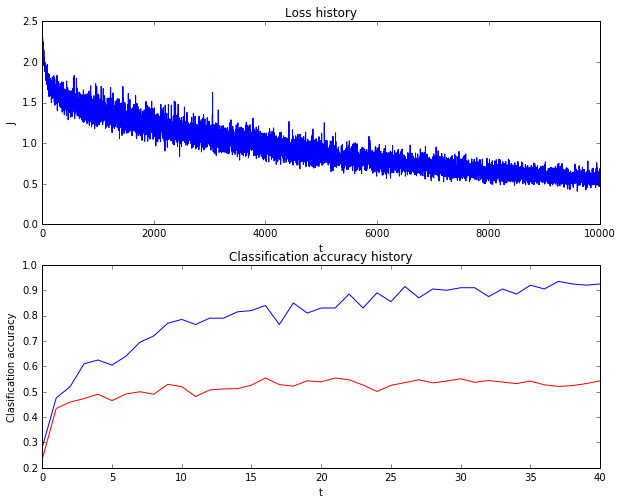

val. acc.: 0.527




In [42]:
best_model = None
best_acc = -1
# TODO: Tune hyperparameters using the validation set. Store your best trained  
# model in best_net.                                                            
#                                                                               
# To help debug your network, it may help to use visualizations similar to the  
# ones we used above; these visualizations will have significant qualitative    
# differences from the ones we saw above for the poorly tuned network.          
#                                                                               
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  
# write code to sweep through possible combinations of hyperparameters          
# automatically like we did on the previous exercises.
n0 = X_dev.shape[1]
n1 = 200
n2 = 10

alpha, lamda, T, B, rho = 2e-3, 3e-2, 10000, 200, 0.95
for alpha in [2e-3]:
    hpara = (alpha, lamda, T, B, rho)
    print hpara
    model = NNet(n0, n1, n2)
    model.train(X, y, X_val, y_val, hpara, debug, show_img)
    
    # Predict on the val. set
    val_acc = np.mean(model.predict(X_val) == y_val)
    print 'val. acc.:', val_acc
    print '\n'
    if val_acc > best_acc:
        best_acc = val_acc
        best_model = model

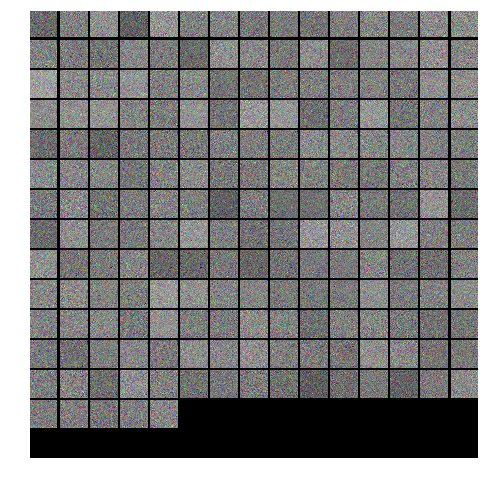

In [43]:
# Visualize the weights of the best model
best_model.visualize_W()

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [45]:
print 'Test accuracy: ', np.mean(best_model.predict(X_test) == y_test)

Test accuracy:  0.0


/home/hao/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app
